In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [117]:
#Aziz: Reading the illegal dumpsites file
dump_data = pd.read_csv("illegaldumpsites.csv")
dump_data['estimated_tons'] = pd.to_numeric(dump_data['estimated_tons'])
dump_data = dump_data.reset_index()
dump_data['counts'] = 0

#copy dataframe
filter = ["Pittsburgh"]
dump2 = dump_data[dump_data.City.isin(filter)]
dump2 = dump2.reset_index()


#lets get the names of the neighborhood
neighborhood_names = dump2['Neighborhood'].unique()

#count of Illegal dump sites
sites_per_neighborhood = dump2['Neighborhood'].value_counts().to_dict()

#create new column in dataframe and for each row in dataframe add tree count for that neighborhood
for index, row in dump2.iterrows():
    dump2.at[index, 'counts'] = sites_per_neighborhood.get(row['Neighborhood'])

636

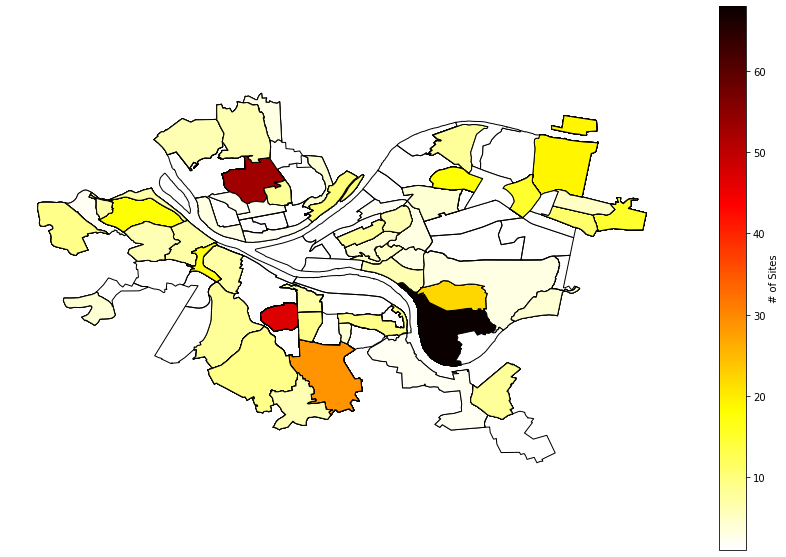

In [76]:
# read in the shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

display(HTML("<h3>Sites Per Neighborhood</h3>"))

#map plotting
sites_map = neighborhoods.merge(dump2, how='left', left_on='hood', right_on='Neighborhood')
sites_plot = sites_map.plot(column='counts', edgecolor="black", cmap='hot_r', legend=True, legend_kwds={'label': "# of Sites"}, figsize=(15, 10))
sites_plot.set_axis_off();

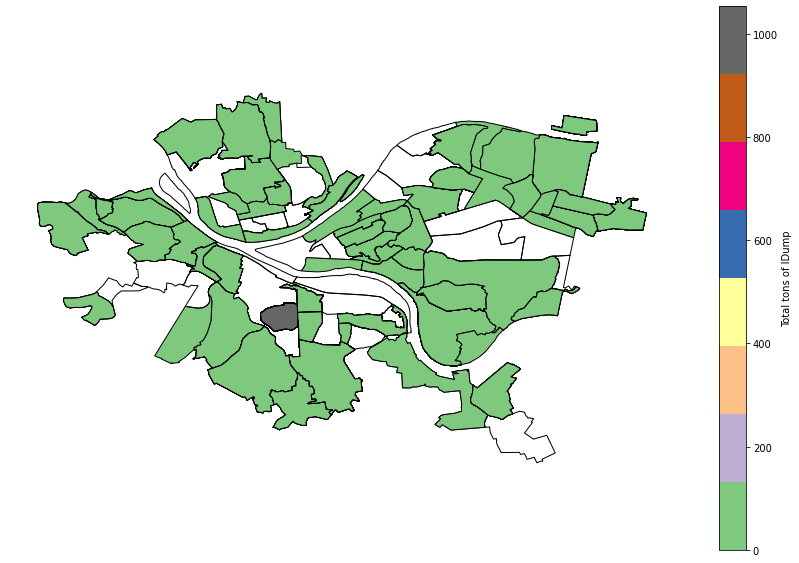

In [107]:
#Tons of weight per neighbourhood
dump3 = dump2.groupby(["Neighborhood"]).estimated_tons.sum().reset_index()
dump3.columns = ['Neighborhood', 'total_tons']

#adding total tons of illegaly displaced dump to original dataframe
dump4 = pd.merge(dump2, dump3, how='left', on='Neighborhood')

display(HTML("<h3>Total Tons of Illegal dump by Neighborhood</h3>"))

#map plotting
total_map = neighborhoods.merge(dump4, how='left', left_on='hood', right_on='Neighborhood')
total_plot = total_map.plot(column='total_tons', edgecolor="black", cmap='Accent', legend=True, legend_kwds={'label': "Total tons of IDump"}, figsize=(15, 10))
total_plot.set_axis_off();

In [119]:
#Max and min illegally displaced waste
maxd = dump3[dump3.total_tons == dump3.total_tons.max()]
mind = dump3[dump3.total_tons == dump3.total_tons.min()]

print('The neighborhood with the least illegaly displaced waste dump:')
print(dump3.min(), '\n')
print('The neighborhood with the most illegaly displaced waste dump:')
print(dump3.max())


The neighborhood with the least illegaly displaced waste dump:
Neighborhood    Allentown
total_tons            0.0
dtype: object 

The neighborhood with the most illegaly displaced waste dump:
Neighborhood    Windgap
total_tons       1053.0
dtype: object
